In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import qcodes as qc
import os
from qcodes import (Measurement,
                    experiments,
                    initialise_database,
                    initialise_or_create_database_at,
                    load_by_guid,
                    load_by_run_spec,
                    load_experiment,
                    load_last_experiment,
                    load_or_create_experiment,
                    new_experiment,
                    ManualParameter)
import matplotlib.pyplot as plt

db_name = "../data/GeSiNW_fully_autonomous_tuning.db" # Database name

db_file_path = os.path.join(os.getcwd(), db_name)
qc.config.core.db_location = db_file_path
initialise_or_create_database_at(db_file_path)

plt.style.use('default')
import sys
sys.path.append('../')

In [2]:
# local_ids = [2]
# from qcodes.dataset import (
#     Measurement,
#     connect,
#     extract_runs_into_db,
#     load_experiment_by_name,
#     load_or_create_experiment,
# )
# source_conn = connect(db_name)
# target_path = "../data/GeSiNW_fully_autonomous_tuning.db"
# target_conn = connect(target_path)
# for _id in local_ids:
#     extract_runs_into_db(db_name, target_path, _id)

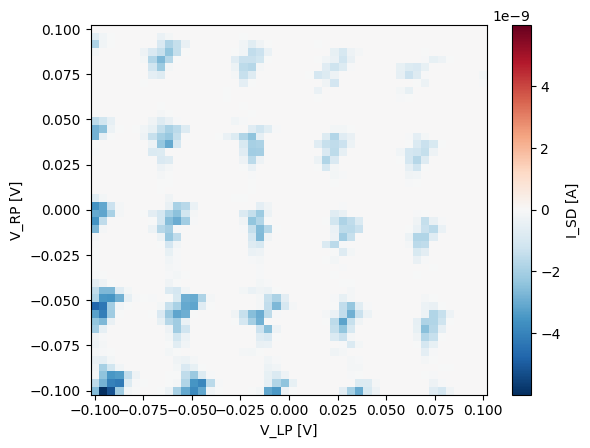

In [3]:
ds = load_by_guid('aecf5a16-0000-0000-0000-018a52b71b48')
ds.to_xarray_dataset()["I_SD"].plot()
data_2d_xarray = ds.to_xarray_dataset()

In [4]:
from signal_processing.high_res_double_dot_clf.dd_clf import HighResDDClassifier
path_to_nn = "../data/dqd_detection_model/all_data.pth"
double_dot_classifier = HighResDDClassifier(path_to_nn=path_to_nn)

prediction = double_dot_classifier.predict(-data_2d_xarray["I_SD"].to_numpy())
print(f'DQD found: {bool(prediction)}')

/Users/jonasschuff/opt/anaconda3/envs/myenv310_5/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/jonasschuff/opt/anaconda3/envs/myenv310_5/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


DQD found: True


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
